<a href="https://colab.research.google.com/github/VindaShinde/R-Projects/blob/main/Assignment_1_HW1_1_Vinda_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Hypothesis Test
Group 1 - Vinda Shinde and Mohammed Shahid Hussain

# Question:
According to the Bureau of Crime Statistics and Research of Australia, the mean length of imprisonment
for motor-vehicle-theft offenders in Australia is 16.7 months. A group of researchers would like to perform
a hypothesis test to decide whether the mean length of imprisonment for motor-vehicle-theft offenders in
Sydney differs from the national mean in Australia. They have found out that Sydney population standard
deviation is 6.0. They have also decided to choose a random sample of size 100 and perform the test at the
significance level of 0.05. Suppose that, in reality, the mean length of imprisonment in Sydney is 15.5 months.

Given:
1.   n = 100 observations (boxes) 
2.   x^ = 15.5 months 
3.   µ = 16.7 months
4.   σ = 6.0







## a. State the null and alternative hypotheses. (3 points)

**ANS:** Null Hypothesis: The mean length of imprisonment for motor-vehicle-theft offenders in Sydney does not differs from the national mean in Australia. Mean equal to 16.7

Alternative Hypothesis: The mean length of imprisonment for motor-vehicle-theft offenders in Sydney differs from the national mean in Australia. Mean not equal to 16.7

# b. Determine the probability of a Type I error.(2 points)

z = (x^ - µ) /(σ / sqrt(n))

In [ ]:
P = 2*pnorm(15.5, mean=16.7, sd=6/sqrt(100))
P

[1] 0.04550026

Here P is (0.045) <= 0.05 -> We reject the Null Hypothesis.
At the 5% significance level, the data provides sufficient evidence to conclude that, the mean length of imprisonment for motor-vehicle-theft offenders in Sydney differs from the national mean in Australia.

# c. Determine the probability of a Type II error. (5 points)

For the probability of making Type II error, we dont reject the Null Hypothesis while it was false. So to find the, critical value...



In [ ]:
x_left = qnorm(0.05/2, mean = 16.7, sd = 6/sqrt(100), lower.tail = T)
x_left

x_right = qnorm(0.05/2,  mean = 16.7, sd = 6/sqrt(100), lower.tail = F)
x_right

[1] 15.52402

[1] 17.87598

Here Critical Value 15.7 and the true mean which we want to consider for is 15.5

In [ ]:
probTypeII = pnorm(x_right, mean = 15.5, sd = 6/sqrt(100), lower.tail = T ) - pnorm(x_left, mean = 15.5, sd = 6/sqrt(100), lower.tail = T )
probTypeII

[1] 0.4839947

There is roughly 48% chance that group of researchers will fail to reject the Bureau of Crime Statistics and Research of Australia's, claim that the mean length of imprisonment for motor-vehicle-theft offenders in Australia is 16.7 months. 

# d. Simulate 1,000 samples, each of size 100. (5 points)

In [11]:
x <- replicate(100,rnorm(1000,mean = 15.5, sd = 6))

In [12]:
nrow(x)
ncol(x)

[1] 1000

[1] 100

# e. Determine the mean of each sample in part d
The mean of every row will be stored in xmeans

In [23]:
xmeans <- rowMeans(x)


# f. For the 1,000 samples, how many do you expect lead to a nonrejection of the null hypothesis?
We expect around 48% of the samples to lead to a nonrejection since that's what our Type 2 error gave us.

# g. For the 1,000 samples, determine the number that lead to nonrejection of the null hypothesis.

In [14]:
i = 0
for(value in xmeans){
    if (value > 15.5){
        if (value < 17.9){
            i = i + 1
        }
    }
}
cat("Out of 1000 samples,",i,"of them lead to nonrejection.","This gives us 49% nonrejection rate from the data.")

Out of 1000 samples, 496 of them lead to nonrejection. This gives us 49% nonrejection rate from the data.

# i. Plot the power curve for the range of true µ between 14 to 19. Interpret your plot. (5 points)

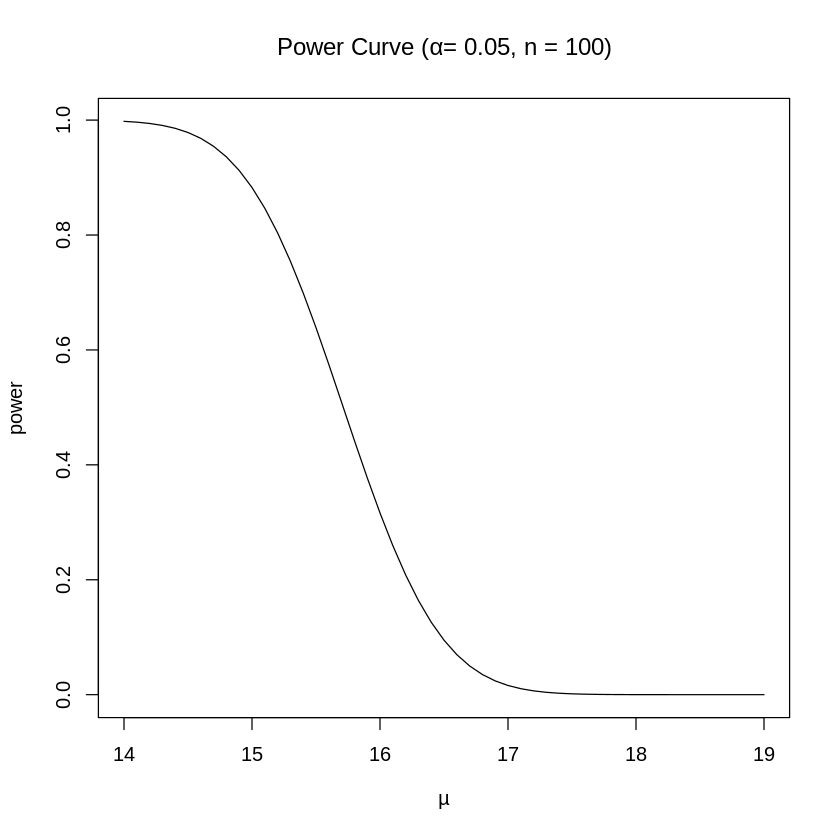

In [15]:
c = qnorm(0.05, mean = 16.7, sd=6/sqrt(100) )
trueMu = seq(14,19, by =0.1)
beta = 1 - pnorm(c, mean = trueMu, sd=6/sqrt(100))
power = 1- beta

plot(trueMu,power,'l', xlab = expression(mu),main = expression(paste("Power Curve (",alpha,"= 0.05, n = 100)")))